In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('Desktop/Mnist/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)

In [5]:
m,n = data.shape
print(m,n)

42000 785


In [6]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

In [7]:
X_train[0].shape

(41000,)

In [8]:
layers_dims = [784, 25, 10, 5, 10]

In [9]:
def initialize_parameters_deep(layer_dims):
    W = []
    B = []
    L = len(layer_dims) 

    for l in range(1, L):
        
        W.append(np.random.randn(layer_dims[l] , layer_dims[l-1])*0.01)
        B.append(np.zeros((layer_dims[l],1)))

        
    return W, B

In [10]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
print(softmax([3.2,1.3,0.2,0.8]))

[0.77514955 0.11593805 0.03859242 0.07031998]


In [11]:
def relu(Z):
    
    A = np.maximum(0,Z) 
    return A

In [12]:
def relu_backward(z):
    z[z > 0] = 1
    z[z < 0] = 0
    return z

In [13]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [14]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [15]:
def linear_forward(A, W, b):
    Z = np.dot(W,A) + b
    
    return Z

In [16]:
def linear_activation_forward(A_prev, W, b, activation):
   
    if activation == "softmax":
        Z = linear_forward(A_prev, W, b)
        A = softmax(Z)
    
    elif activation == "relu":
        Z  = linear_forward(A_prev, W, b)
        A  = relu(Z)

    return A, Z

In [17]:
def model_forward(X, W, B):
    
    L = len(W)
    
    prev = X
    A = []
    Z = []
    for i in range(L):
        if i == L-1:
            a, z = linear_activation_forward(prev, W[i], B[i], activation = "softmax")
        else:
            a, z = linear_activation_forward(prev, W[i], B[i], activation = "relu")
        
        A.append(a)
        Z.append(z)
        prev = a
        
          
    return A, Z

In [18]:
def model_backwards(A, W, Z, X, Y, m) :
    
    L = len(W)
    
    dA = []
    dZ = []
    dW = []
    dB = []
    for i in reversed(range(L)):
        if i == L-1:
            dZ.append(A[i] - one_hot(Y))
            dW.append(np.dot(dZ[L-1-i], A[i-1].T)/m)
            dB.append(1 / m * np.sum(dZ[L-1-i]))
            dA.append(0)
        else:
            dA.append(np.dot(W[i+1].T, dZ[L-1-i-1]))
            dZ.append(dA[L-1-i] * relu_backward(Z[i]))
            if(i == 0):
                dW.append(np.dot(dZ[L-1-i],X.T)/m)
            else:
                dW.append(np.dot(dZ[L-1-i],A[i-1].T)/m)
            dB.append(1 / m * np.sum(dZ[L-1-i]))
            
    dW.reverse()
    dB.reverse()
    
    return dW, dB

In [19]:
def update_parameters(W, B, dW, dB, learning_rate):
    for i in range(len(W)):
        W[i] = W[i] - learning_rate*dW[i]
        B[i] = B[i] - learning_rate*dB[i]
    
    return W, B

In [20]:
def model(X,Y,layers_dims, learning_rate, num_iterations):
    m = X.shape[1]
    W, B = initialize_parameters_deep(layers_dims)

    
    for i in range(1, num_iterations+1):
        A, Z = model_forward(X, W, B)
        dW, dB = model_backwards(A, W, Z, X, Y, m)
        W, B = update_parameters(W, B, dW, dB, learning_rate)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A[-1])
            print(get_accuracy(predictions, Y))
            
    return W, B

In [25]:
W, B = model(X_train, Y_train, layers_dims, learning_rate = 0.01, num_iterations = 5000)

Iteration:  10
[8 8 8 ... 0 8 5] [1 5 1 ... 7 6 9]
0.11178048780487805
Iteration:  20
[8 8 8 ... 0 8 5] [1 5 1 ... 7 6 9]
0.11331707317073171
Iteration:  30
[8 8 8 ... 0 8 5] [1 5 1 ... 7 6 9]
0.1145609756097561
Iteration:  40
[8 8 8 ... 0 8 5] [1 5 1 ... 7 6 9]
0.11597560975609757
Iteration:  50
[8 8 8 ... 3 8 5] [1 5 1 ... 7 6 9]
0.11617073170731708
Iteration:  60
[8 8 8 ... 3 8 8] [1 5 1 ... 7 6 9]
0.1162439024390244
Iteration:  70
[8 8 8 ... 3 8 8] [1 5 1 ... 7 6 9]
0.11658536585365854
Iteration:  80
[8 8 8 ... 3 8 8] [1 5 1 ... 7 6 9]
0.11739024390243902
Iteration:  90
[8 8 8 ... 3 8 8] [1 5 1 ... 7 6 9]
0.1181951219512195
Iteration:  100
[8 8 8 ... 3 8 8] [1 5 1 ... 7 6 9]
0.11902439024390243
Iteration:  110
[8 8 8 ... 3 8 8] [1 5 1 ... 7 6 9]
0.11965853658536585
Iteration:  120
[8 8 8 ... 3 8 8] [1 5 1 ... 7 6 9]
0.12078048780487805
Iteration:  130
[8 8 8 ... 4 8 8] [1 5 1 ... 7 6 9]
0.12134146341463414
Iteration:  140
[8 8 8 ... 4 8 8] [1 5 1 ... 7 6 9]
0.12168292682926829
Iter

Iteration:  1160
[1 6 1 ... 0 6 9] [1 5 1 ... 7 6 9]
0.6502682926829269
Iteration:  1170
[1 6 1 ... 0 6 9] [1 5 1 ... 7 6 9]
0.6691219512195122
Iteration:  1180
[1 6 1 ... 7 6 7] [1 5 1 ... 7 6 9]
0.654829268292683
Iteration:  1190
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.6714146341463415
Iteration:  1200
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.6777317073170732
Iteration:  1210
[1 6 1 ... 0 6 6] [1 5 1 ... 7 6 9]
0.47397560975609754
Iteration:  1220
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.7934390243902439
Iteration:  1230
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.7712926829268293
Iteration:  1240
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8109024390243903
Iteration:  1250
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.5984146341463414
Iteration:  1260
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.6982682926829268
Iteration:  1270
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.7445365853658537
Iteration:  1280
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.7623658536585366
Iteration:  1290
[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.813439024

Iteration:  2310
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9334146341463415
Iteration:  2320
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9129756097560976
Iteration:  2330
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9359268292682927
Iteration:  2340
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.937780487804878
Iteration:  2350
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9367804878048781
Iteration:  2360
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9318780487804879
Iteration:  2370
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.908390243902439
Iteration:  2380
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9209756097560976
Iteration:  2390
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9369512195121952
Iteration:  2400
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9368536585365854
Iteration:  2410
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9319268292682927
Iteration:  2420
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9265609756097561
Iteration:  2430
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9382682926829268
Iteration:  2440
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.93914634146

Iteration:  3460
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9516341463414634
Iteration:  3470
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9506097560975609
Iteration:  3480
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9318780487804879
Iteration:  3490
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9419512195121951
Iteration:  3500
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9531463414634146
Iteration:  3510
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9546097560975609
Iteration:  3520
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9545365853658536
Iteration:  3530
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9534634146341463
Iteration:  3540
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9472195121951219
Iteration:  3550
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9299512195121952
Iteration:  3560
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9534634146341463
Iteration:  3570
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9529512195121951
Iteration:  3580
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9483414634146341
Iteration:  3590
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.952487804

Iteration:  4610
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.961
Iteration:  4620
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9481463414634146
Iteration:  4630
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9531951219512195
Iteration:  4640
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9652439024390244
Iteration:  4650
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9622439024390244
Iteration:  4660
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9459268292682926
Iteration:  4670
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9645609756097561
Iteration:  4680
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9656585365853658
Iteration:  4690
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9618780487804878
Iteration:  4700
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9412439024390243
Iteration:  4710
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.963390243902439
Iteration:  4720
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9665853658536585
Iteration:  4730
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9655121951219512
Iteration:  4740
[1 5 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.9491219512195121
Iterat

In [22]:
def make_predictions(X, W, B):
    A, Z = model_forward(X, W, B)
    predictions = get_predictions(A[-1])
    return predictions

def test_prediction(index, W, B):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W, B)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


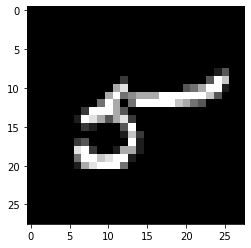

In [35]:
test_prediction(1, W, B)